[INFO] Project root set to: /Users/bertvos/Documents/Notebooks/kr8cht_review_anonymous

[REVIEW] Using artifact for embedding: fasttext


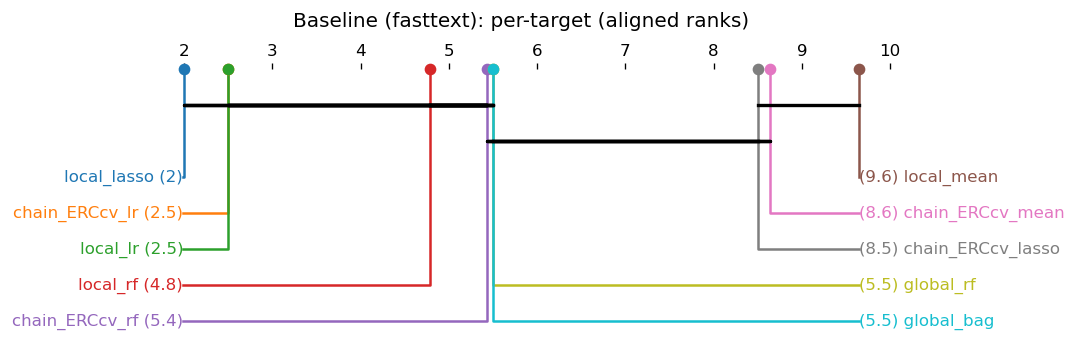

Plot saved → /Users/bertvos/Documents/Notebooks/kr8cht_review_anonymous/outputs/a_static/plots/baseline_fasttext_aligned_cd.png

Median RRMSE per target (sorted low→high):
chain_ERCcv_lr       0.816
local_lr             0.821
local_lasso          0.824
local_rf             0.880
chain_ERCcv_rf       0.882
global_bag           0.900
global_rf            0.915
chain_ERCcv_mean     1.000
local_mean           1.000
chain_ERCcv_lasso    1.000
  ↳ saved → /Users/bertvos/Documents/Notebooks/kr8cht_review_anonymous/outputs/a_static/results/baseline_fasttext_aligned_median.csv

*Aligned-Friedman* (blocks = targets)
  χ²_F = 102.031    F_F = 55.339

*Original-Friedman* (blocks = targets)
  χ²_F = 102.996    p = 3.89e-18    F_F = 58.204

Nemenyi p-values (aligned post-hoc):
                   chain_ERCcv_lasso  chain_ERCcv_lr  chain_ERCcv_mean  chain_ERCcv_rf  global_bag  global_rf  local_lasso  local_lr  local_mean  local_rf
chain_ERCcv_lasso             1.0000          0.0000            1.0000 

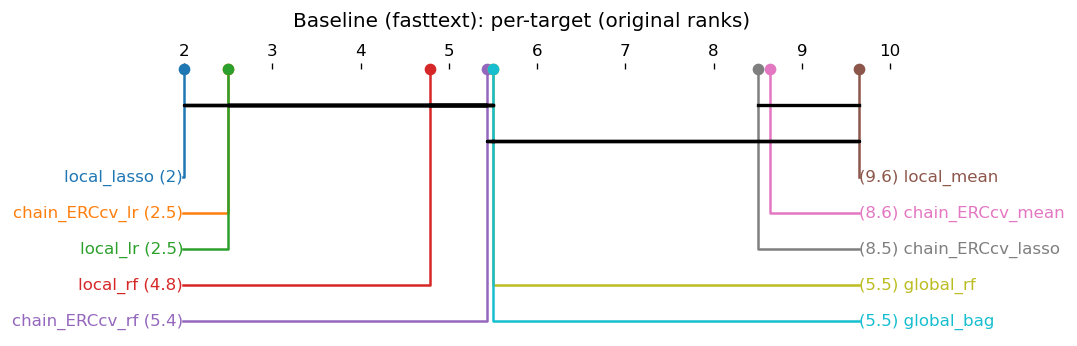

Plot saved → /Users/bertvos/Documents/Notebooks/kr8cht_review_anonymous/outputs/a_static/plots/baseline_fasttext_original_cd.png
Legacy Wilcoxon p-values saved → /Users/bertvos/Documents/Notebooks/kr8cht_review_anonymous/outputs/a_static/results/baseline_fasttext_wilcoxon_p.csv
[INFO] Wrote canonical extended stats → /Users/bertvos/Documents/Notebooks/kr8cht_review_anonymous/outputs/a_static/results/baseline_fasttext_extended_stats.csv

[REVIEW] Using artifact for embedding: word2vec


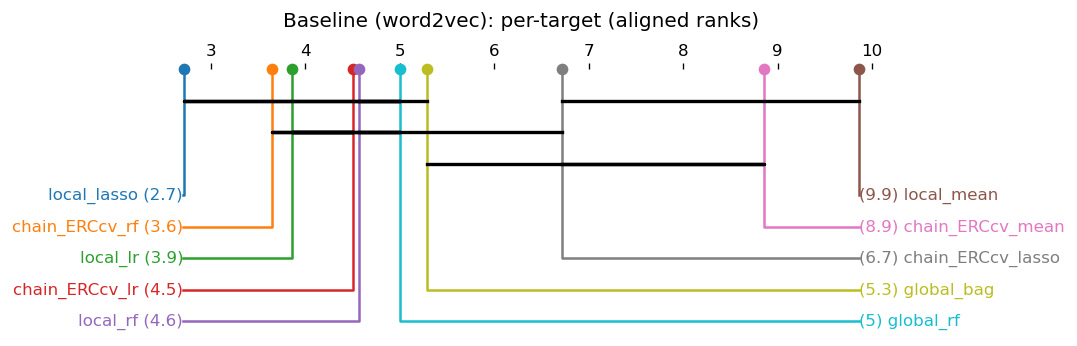

Plot saved → /Users/bertvos/Documents/Notebooks/kr8cht_review_anonymous/outputs/a_static/plots/baseline_word2vec_aligned_cd.png

Median RRMSE per target (sorted low→high):
local_lasso          0.857
local_lr             0.869
chain_ERCcv_rf       0.871
chain_ERCcv_lr       0.884
local_rf             0.894
global_bag           0.912
global_rf            0.922
chain_ERCcv_lasso    0.933
chain_ERCcv_mean     1.000
local_mean           1.000
  ↳ saved → /Users/bertvos/Documents/Notebooks/kr8cht_review_anonymous/outputs/a_static/results/baseline_word2vec_aligned_median.csv

*Aligned-Friedman* (blocks = targets)
  χ²_F = 72.997    F_F = 17.904

*Original-Friedman* (blocks = targets)
  χ²_F = 72.674    p = 4.54e-12    F_F = 17.717

Nemenyi p-values (aligned post-hoc):
                   chain_ERCcv_lasso  chain_ERCcv_lr  chain_ERCcv_mean  chain_ERCcv_rf  global_bag  global_rf  local_lasso  local_lr  local_mean  local_rf
chain_ERCcv_lasso             1.0000          0.6449            0.6878   

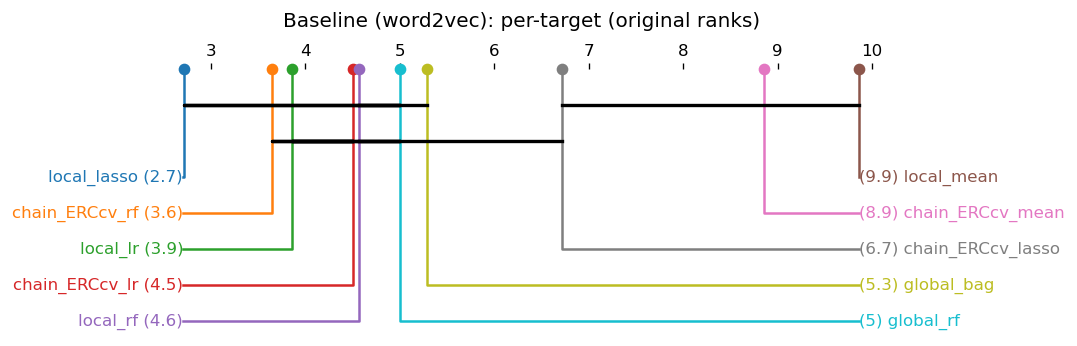

Plot saved → /Users/bertvos/Documents/Notebooks/kr8cht_review_anonymous/outputs/a_static/plots/baseline_word2vec_original_cd.png
Legacy Wilcoxon p-values saved → /Users/bertvos/Documents/Notebooks/kr8cht_review_anonymous/outputs/a_static/results/baseline_word2vec_wilcoxon_p.csv
[INFO] Wrote canonical extended stats → /Users/bertvos/Documents/Notebooks/kr8cht_review_anonymous/outputs/a_static/results/baseline_word2vec_extended_stats.csv
[INFO] Wrote → embeddings_aligned_nemenyi_p.csv
[INFO] Wrote → embeddings_original_nemenyi_p.csv

Across-embedding Wilcoxon:
  statistic = 24.500,  p = 0.804688
Across-embedding Wilcoxon p-values saved → /Users/bertvos/Documents/Notebooks/kr8cht_review_anonymous/outputs/a_static/results/embeddings_pairwise_wilcoxon_p.csv

[REVIEW] Performance grid across embeddings (from artifacts)


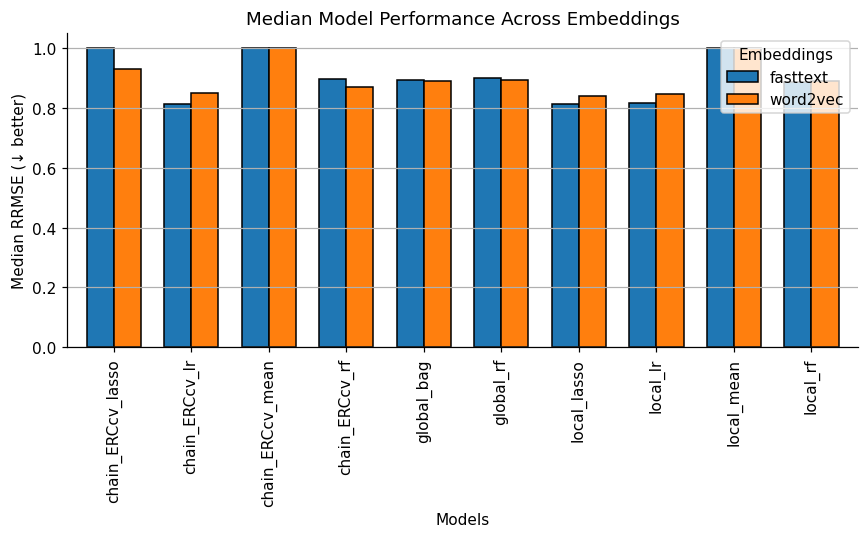

Plot saved → /Users/bertvos/Documents/Notebooks/kr8cht_review_anonymous/outputs/a_static/plots/rrmse_across_embeddings_median.png
Total execution time: 1.4 s


In [1]:
"""
a_static.ipynb
───────────────────────────────────────────────────────────────────────────────
Performance comparison of ten multi-target regression models of two families (linear vs
non-linear) for three levels (local vs global vs chain) on two static word embeddings for 
Dutch text.

This script can be run in two modes (toggle `REVIEW_MODE` at the top of the file):

• Compute mode (`REVIEW_MODE=False`) — full pipeline (uses private data & embeddings):
  1. Loads and preprocesses activity data:
     - Reads expert-scored activities, descriptions, and domain metadata.
     - Applies spaCy Dutch pipeline for text normalization.
  2. Converts texts to embeddings:
     - Loads pre-trained Word2Vec and FastText Dutch models.
     - Computes average token embeddings per activity.
  3. Trains and evaluates multi-target regression models:
     - Compares local, global, and chain-based regressors via LOOCV.
     - Performs hyperparameter tuning with PCA and model-specific grids.
     - Calculates fold-level RRMSE (and MAE/RMSE in-memory for diagnostics).
  4. Conducts statistical significance tests:
     - Aligned and original Friedman tests with post-hoc Nemenyi diagrams (per embedding).
     - Pairwise Wilcoxon signed-rank tests (per embedding).
     - Cross-embedding tests (Friedman/Nemenyi and pairwise Wilcoxon).
  5. Summarizes performance:
     - Writes **RRMSE-only** extended statistics (mean, std, median, quartiles) per model.
     - Saves CSV reports to `outputs/a_static/results`.
  6. Plots results:
     - Saves critical-difference diagrams.
     - Generates median RRMSE bar charts across embeddings.

• Review mode (`REVIEW_MODE=True`) — fast, data-free re-render (idempotent from artifacts):
  1. Loads precomputed fold-level artifacts `baseline_{embedding}_loocv_rrmse.npy` from `outputs/a_static/results/`.
  2. Recomputes all significance tests and plots from these artifacts only:
     - Per-embedding Friedman/Nemenyi and Wilcoxon.
     - Cross-embedding Friedman/Nemenyi and pairwise Wilcoxon.
  3. Writes the **same filenames** as compute mode (overwrites if present), including
     **RRMSE-only** extended statistics and all figures.
  4. Does **not** access `data/` or `embeddings/`, and does **not** retrain models.

Inputs:
- (Compute mode) `data/activity_scores.csv`
- (Compute mode) `data/activities.csv`
- (Compute mode) `data/domains.xlsx`
- (Compute mode) `embeddings/word2vec_costoo.bin`
- (Compute mode) `embeddings/cc.nl.300.bin.gz`
- (Review mode) `outputs/a_static/results/baseline_{embedding}_loocv_rrmse.npy` (required)

Outputs:
- `outputs/a_static/results/baseline_{embedding}_vectors.npy`                         (compute)
- `outputs/a_static/results/baseline_{embedding}_loocv_rrmse.npy`                    (compute; used by review)
- `outputs/a_static/results/baseline_{embedding}_extended_stats.csv`                 (RRMSE-only; compute & review)
- `outputs/a_static/results/baseline_{embedding}_{aligned|original}_nemenyi_p.csv`   (per-embedding; compute & review)
- `outputs/a_static/results/baseline_{embedding}_wilcoxon_p.csv`                     (per-embedding; compute & review)
- `outputs/a_static/results/embeddings_{aligned|original}_nemenyi_p.csv`             (cross-embedding; compute & review)
- `outputs/a_static/results/embeddings_pairwise_wilcoxon_p.csv`                      (cross-embedding; compute & review)
- `outputs/a_static/plots/baseline_{embedding}_{aligned|original}_cd.png`
- `outputs/a_static/plots/rrmse_across_embeddings_median.png`
"""

# ────────────────────────────────────────────
# Imports
# ────────────────────────────────────────────

import glob
import os
import sys
import time
import warnings
from collections import defaultdict
from itertools import combinations
from pathlib import Path

from gensim.models import KeyedVectors
from gensim.models.fasttext import load_facebook_model
from joblib import Parallel, delayed
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scikit_posthocs as sp
from scipy.stats import friedmanchisquare, wilcoxon
from sklearn.base import clone, BaseEstimator, RegressorMixin
from sklearn.decomposition import PCA
from sklearn.dummy import DummyRegressor
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import GridSearchCV, LeaveOneOut, KFold
from sklearn.multioutput import MultiOutputRegressor
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.utils import check_random_state
import spacy
from statsmodels.stats.multitest import multipletests

# ────────────────────────────────────────────
# Paths
# ────────────────────────────────────────────
def get_project_root(marker: str = "LICENSE") -> Path:
    """Walk up from CWD to find repo root (file marker present)."""
    cwd = Path.cwd().resolve()
    for cand in (cwd, *cwd.parents):
        if (cand / marker).is_file():
            return cand
    # Fallback to current directory if not found (keeps runnable elsewhere)
    return cwd

ROOT = get_project_root()
print(f"[INFO] Project root set to: {ROOT}")

EMB_DIR    = ROOT / "embeddings"                 # not present in current repo & NOT used in REVIEW_MODE
DATA_DIR   = ROOT / "data"                       # not present in current repo & NOT used in REVIEW_MODE
OUTPUTS_DIR = ROOT / "outputs"
PLOTS_DIR  = OUTPUTS_DIR / "a_static" / "plots"
RESULTS_DIR = OUTPUTS_DIR / "a_static" / "results"

for p in (PLOTS_DIR, RESULTS_DIR):
    p.mkdir(parents=True, exist_ok=True)

# Suppress FutureWarnings
warnings.simplefilter("ignore", category=FutureWarning)
warnings.filterwarnings(
    "ignore",
    category=RuntimeWarning,
    message="invalid value encountered in scalar divide",
    module=r"scipy\.stats\._wilcoxon",
)

# Matplotlib: keep open-figure warnings away & improve default look
plt.rcParams.update({
    "figure.max_open_warning": 0,
    "axes.spines.top": False,
    "axes.spines.right": False,
    "font.size": 10,
})

# Define initializer for parallel processing to set warning filters in child processes
def init_worker():
    import warnings
    warnings.simplefilter("ignore", category=FutureWarning)

# ────────────────────────────────────────────
# Global configuration
# ────────────────────────────────────────────
REVIEW_MODE  = True
RANDOM_SEED  = 42
n_cores      = 6
nlp          = None

# Lazy-load spaCy only if actually needed to compute
def _ensure_spacy():
    global nlp
    if nlp is None:
        nlp = spacy.load("nl_core_news_sm")
        
# ────────────────────────────────────────────
# 0. Artifact loading (REVIEW_MODE)
# ────────────────────────────────────────────

def _load_rrmse_artifact(npy_path: Path) -> dict:
    """
    Return {model_name -> (folds x targets) array} from a saved .npy artifact.
    Handles np.save of dicts (pickle).
    """
    arr = np.load(npy_path, allow_pickle=True)
    if isinstance(arr.item(), dict):
        return arr.item()
    raise ValueError(f"Unexpected artifact format in {npy_path}")

def discover_static_artifacts():
    """
    Find precomputed baseline artifacts under outputs/a_static/results/.
    Looks for files like:
      baseline_word2vec_loocv_rrmse.npy
      baseline_fasttext_loocv_rrmse.npy
    Returns: {embedding_name: path}
    """
    mapping = {}
    for f in RESULTS_DIR.glob("baseline_*_loocv_rrmse.npy"):
        name = f.stem  # baseline_word2vec_loocv_rrmse
        parts = name.split("_")
        # assume 'baseline_<emb>_loocv_rrmse'
        if len(parts) >= 3:
            emb = parts[1]
            mapping[emb] = f
    return mapping

def cross_embedding_nemenyi_from_rrmse(rrmse_by_emb: dict):
    """
    rrmse_by_emb: {embedding -> {model -> (folds x targets) ndarray}}
    Writes:
      - embeddings_aligned_nemenyi_p.csv
      - embeddings_original_nemenyi_p.csv
    """
    all_models = sorted(next(iter(rrmse_by_emb.values())).keys())
    all_embs   = sorted(rrmse_by_emb.keys())
    mat = np.vstack([
        [float(np.median(np.asarray(rrmse_by_emb[e][m]).flatten()))
         for m in all_models]
        for e in all_embs
    ])
    # aligned
    ranks_aligned = aligned_ranks(mat)
    nem_a = sp.posthoc_nemenyi_friedman(ranks_aligned)
    nem_a.index = nem_a.columns = all_models
    nem_a.to_csv(RESULTS_DIR / "embeddings_aligned_nemenyi_p.csv")
    print("[INFO] Wrote → embeddings_aligned_nemenyi_p.csv")
    # original
    nem_o = sp.posthoc_nemenyi_friedman(mat)
    nem_o.index = nem_o.columns = all_models
    nem_o.to_csv(RESULTS_DIR / "embeddings_original_nemenyi_p.csv")
    print("[INFO] Wrote → embeddings_original_nemenyi_p.csv")


def summarize_medians_for_plot(rrmse_dict: dict):
    """
    Build {model -> {'median': value}} from {model -> (folds x targets) array}.
    """
    out = {}
    for m, mat in rrmse_dict.items():
        out[m] = {"median": float(np.median(np.asarray(mat).flatten()))}
    return out

def write_extended_stats_rrmse_only(embedding_name: str, rrmse_dict: dict) -> pd.DataFrame:
    """
    Canonical writer for extended stats:
    - Overwrites outputs/a_static/results/baseline_{embedding}_extended_stats.csv
    - RRMSE-only (mean, std, median, 25th, 75th)
    - Deterministic model order (sorted keys)
    """
    rows = []
    for model_name in sorted(rrmse_dict.keys()):
        arr = np.asarray(rrmse_dict[model_name]).flatten()
        rows.append({
            "model": model_name,
            "rrmse_mean":   float(np.mean(arr)),
            "rrmse_std":    float(np.std(arr)),
            "rrmse_median": float(np.median(arr)),
            "rrmse_25th":   float(np.percentile(arr, 25)),
            "rrmse_75th":   float(np.percentile(arr, 75)),
        })
    df = pd.DataFrame(rows).set_index("model")
    out = RESULTS_DIR / f"baseline_{embedding_name}_extended_stats.csv"
    df.to_csv(out)  # overwrite
    print(f"[INFO] Wrote canonical extended stats → {out}")
    return df

def as_rrmse_dict_from_final_metrics(final_metrics: dict) -> dict:
    """
    From compute-mode `final_metrics`, extract the same structure we load in review:
      {model_name -> (folds x targets) ndarray} for RRMSE only.
    """
    return {m: np.asarray(final_metrics[m]["rrmse"]) for m in sorted(final_metrics.keys())}
    
# ────────────────────────────────────────────
# 1. Load data
# ────────────────────────────────────────────
def load_data():
    """
    Load and process the dataset.
    Returns:
        data_merged: DataFrame with pivoted activity scores merged with the 'question' column from activities.
        df_activities: DataFrame of activities.
        df_domains: DataFrame of domains.
    """ 
    activity_scores_path = os.path.join(DATA_DIR, "activity_scores.csv")
    activities_path      = os.path.join(DATA_DIR, "activities.csv")
    domains_path         = os.path.join(DATA_DIR, "domains.xlsx")
    
    try:
        df_scores = pd.read_csv(activity_scores_path)
        df_activities = pd.read_csv(activities_path)
        df_domains = pd.read_excel(domains_path)
    except Exception as e:
        print(f"Error loading data files: {e}")
        raise

    try:
        # pivot df_scores from long-format into wide format, turn new index into regular column to later be able to merge on 'activity_id'
        data_merged = df_scores.pivot(index="activity_id", columns="domain_id", values="score").reset_index()
        # for each column if it is an integer rename numeric domain columns into string, else leave it unchanged
        data_merged = data_merged.rename(columns=lambda x: f"domain{x}" if isinstance(x, int) else x) 
        # Merge with df_activities to include text in 'question' column
        data_merged = pd.merge(
            data_merged,
            df_activities[['activity_id', 'question']],
            on='activity_id',
            how='left'
        )
    except Exception as e:
        print(f"Error processing data: {e}")
        raise

    return data_merged, df_activities, df_domains


# ────────────────────────────────────────────
# 2. Load Embeddings
# ────────────────────────────────────────────

def load_embeddings():
    """
    Load pre-trained Dutch Word2Vec vectors and FastText model.
    Returns:
        w2v_vectors, fasttext_model
    """
    try:
        w2v_path      = os.path.join(EMB_DIR, "word2vec_costoo.bin")
        fasttext_path = os.path.join(EMB_DIR, "cc.nl.300.bin.gz")
        w2v_vectors = KeyedVectors.load_word2vec_format(w2v_path, binary=True)
        fasttext_model = load_facebook_model(fasttext_path)
    except Exception as e:
        print(f"Error loading embeddings: {e}")
        raise
    return w2v_vectors, fasttext_model


def text_to_embedding(text, model, embedding_dim=300):
    """
    Convert a string `text` into a single embedding vector by:
      1) Tokenizing and preprocessing using spaCy (Dutch model):
         - Lowercasing
         - Tokenization
         - Lemmatization
         - Removal of punctuation and non-alphabetic tokens
         - Removal of stopwords
      2) Averaging the embeddings of the remaining tokens using the provided model.
      3) Returning a zero vector if no tokens are in the model’s vocabulary.
    """
    # Tokenize the text using spaCy
    _ensure_spacy()
    doc = nlp(text)
    # Build a list of tokens that:
    # - are alphabetic (removes punctuation, numbers, etc.)
    # - are not stopwords
    # - are lowercased and lemmatized
    tokens = [token.lemma_.lower() for token in doc if token.is_alpha and not token.is_stop]
    
    # Retrieve the correct word-vector lookup:
    # if model is FastText, use model.wv; if it's a KeyedVectors instance (Word2Vec), use model directly.
    kv = getattr(model, 'wv', model)
    
    # Collect vectors for tokens that are within the model's vocabulary.
    valid_vectors = [kv[tok] for tok in tokens if tok in kv]
    
    # If no valid vectors were found, return a zero vector.
    if not valid_vectors:
        return np.zeros(embedding_dim)
        
    # Return the mean (average pooling) of the valid word vectors.
    return np.mean(valid_vectors, axis=0)


# ────────────────────────────────────────────
# 3. Define models
# ────────────────────────────────────────────

# Local methods (one model per target)

def local_dummy_mean():
    return MultiOutputRegressor(DummyRegressor(strategy="mean"))


def local_linear_regression():
    return MultiOutputRegressor(LinearRegression())


def local_lasso(alpha=0.1):
    return MultiOutputRegressor(Lasso(alpha=alpha))


def local_random_forest(n_estimators=100, max_depth=None):
    return MultiOutputRegressor(RandomForestRegressor(n_estimators=n_estimators,
                                                      max_depth=max_depth,
                                                      random_state=RANDOM_SEED))


# Global methods (one model for all targets)
def global_bagging_multioutput(n_estimators=100, max_depth=None):
    base_est = DecisionTreeRegressor(random_state=RANDOM_SEED, max_depth=max_depth)
    return BaggingRegressor(estimator=base_est, n_estimators=n_estimators, random_state=RANDOM_SEED)


def global_rf_multioutput(n_estimators=100, max_depth=None):
    return RandomForestRegressor(n_estimators=n_estimators, max_depth=max_depth,
                                 random_state=RANDOM_SEED)


# Chain-based method classes
class RegressorChainCV(BaseEstimator, RegressorMixin):
    """
    A custom "chain" regressor, doing cross-validated out-of-fold predictions
    for each target in the chain order. The out-of-fold predictions become
    features for the next model in the chain.
    """
    def __init__(self, base_estimator, order=None, cv_splits=5, random_state=RANDOM_SEED):
        self.base_estimator = base_estimator
        self.order = order
        self.cv_splits = cv_splits
        self.random_state = random_state
        self.chain_models_ = []
        self.n_targets_ = None

    def fit(self, X, Y):
        rng = check_random_state(self.random_state)
        n_samples, self.n_targets_ = Y.shape
        if self.order is None:
            self.order = np.arange(self.n_targets_)
        oof_cols = []
        kf = KFold(n_splits=self.cv_splits, shuffle=True, random_state=rng)
        X_chain = np.copy(X)
        
        # Generate out-of-fold predictions for each target in chain order
        for idx_in_chain, target_idx in enumerate(self.order):
            y_target = Y[:, target_idx]
            oof_pred = np.zeros(n_samples, dtype=float)
            for train_index, valid_index in kf.split(X_chain):
                X_train_fold = X_chain[train_index]
                y_train_fold = y_target[train_index]
                X_valid_fold = X_chain[valid_index]
                model = clone(self.base_estimator)
                model.fit(X_train_fold, y_train_fold)
                oof_pred[valid_index] = model.predict(X_valid_fold)
            oof_pred = oof_pred.reshape(-1, 1)
            oof_cols.append(oof_pred)
            X_chain = np.hstack([X_chain, oof_pred])
        
        # Now train final models on entire dataset
        self.chain_models_ = []
        accumulated_cols = []
        for idx, target_idx in enumerate(self.order):
            y_target = Y[:, target_idx]
            if idx == 0:
                X_full_chain = np.copy(X)
            else:
                accumulated_cols.append(oof_cols[idx - 1])
                X_full_chain = np.hstack([X, np.hstack(accumulated_cols)])
            final_model = clone(self.base_estimator)
            final_model.fit(X_full_chain, y_target)
            self.chain_models_.append(final_model)
        return self

    def predict(self, X):
        X_extended = np.copy(X)
        n_samples = X.shape[0]
        preds = np.zeros((n_samples, self.n_targets_), dtype=float)
        for i, target_idx in enumerate(self.order):
            model = self.chain_models_[i]
            yhat = model.predict(X_extended).reshape(-1, 1)
            preds[:, target_idx] = yhat[:, 0]
            X_extended = np.hstack([X_extended, yhat])
        return preds


class EnsembleRegressorChainsCV(BaseEstimator, RegressorMixin):
    """
    An ensemble of RegressorChainCV models, each with a random target order.
    Predictions are the average across the ensemble.
    """
    def __init__(self, base_estimator, n_chains=5, cv_splits=5, random_state=RANDOM_SEED):
        self.base_estimator = base_estimator
        self.n_chains = n_chains
        self.cv_splits = cv_splits
        self.random_state = random_state
        self.ensemble_ = None
        self.n_targets_ = None

    def fit(self, X, Y):
        rng = check_random_state(self.random_state)
        self.n_targets_ = Y.shape[1]
        self.ensemble_ = []
        for i in range(self.n_chains):
            order = np.arange(self.n_targets_)
            rng.shuffle(order)
            chain = RegressorChainCV(
                base_estimator=self.base_estimator,
                order=order,
                cv_splits=self.cv_splits,
                random_state=rng.randint(0, 999999)
            )
            chain.fit(X, Y)
            self.ensemble_.append((order, chain))
        return self

    def predict(self, X):
        all_preds = []
        for (order, chain) in self.ensemble_:
            yhat = chain.predict(X)
            all_preds.append(yhat)
        avg_preds = np.mean(all_preds, axis=0)
        return avg_preds


# Chain-based methods with multiple base estimators
def chain_ERCcv_lr():
    return EnsembleRegressorChainsCV(base_estimator=LinearRegression(), random_state=RANDOM_SEED)

def chain_ERCcv_lasso():
    return EnsembleRegressorChainsCV(base_estimator=Lasso(alpha=0.1), random_state=RANDOM_SEED)

def chain_ERCcv_rf():
    return EnsembleRegressorChainsCV(base_estimator=RandomForestRegressor(random_state=RANDOM_SEED),
                                     random_state=RANDOM_SEED)

def chain_ERCcv_mean():
    return EnsembleRegressorChainsCV(base_estimator=DummyRegressor(strategy="mean"),
                                     random_state=RANDOM_SEED)


# Define model_constructors
model_constructors = {
    "local_lr": local_linear_regression,
    "local_lasso": local_lasso,
    "local_rf": local_random_forest,
    "local_mean": local_dummy_mean,
    "global_bag": global_bagging_multioutput,
    "global_rf": global_rf_multioutput,
    "chain_ERCcv_lr": chain_ERCcv_lr,
    "chain_ERCcv_lasso": chain_ERCcv_lasso,
    "chain_ERCcv_rf": chain_ERCcv_rf,
    "chain_ERCcv_mean": chain_ERCcv_mean
}

# ────────────────────────────────────────────
# 4. Define evaluation metrics
# ────────────────────────────────────────────

def relative_rmse(y_true, y_pred, y_train_mean):
    """
    Compute RRMSE for a single target:
    RMSE(model) / RMSE(mean-baseline)
    """
    mse_model = mean_squared_error(y_true, y_pred)
    rmse_model = np.sqrt(mse_model)
    mse_mean = mean_squared_error(y_true, np.full_like(y_true, y_train_mean))
    rmse_mean = np.sqrt(mse_mean)
    return rmse_model / (rmse_mean + 1e-12)  # small epsilon to avoid division by zero


def compute_all_metrics(y_true, y_pred, y_train_mean):
    """
    Compute a dictionary with multiple metrics for a single-target case.
    - RRMSE (relative RMSE)
    - MAE
    - RMSE (non-relative)
    Returns a dict with these metrics.
    """
    metrics_out = {}
    metrics_out['rrmse'] = relative_rmse(y_true, y_pred, y_train_mean)
    metrics_out['mae']   = mean_absolute_error(y_true, y_pred)
    metrics_out['rmse']  = np.sqrt(mean_squared_error(y_true, y_pred))
    return metrics_out


# ────────────────────────────────────────────
# 5. HP-tuning & LOOCV
# ────────────────────────────────────────────

def build_pipeline_for_model(model_key):
    """
    Build a Pipeline for each model that includes PCA (with n_components to be tuned)
    and the model itself. Return (pipeline, param_grid) for use in GridSearchCV.
    """
    # Assign step named 'pca' to variable 'pca_step' with random_state for reproducibility
    pca_step = ('pca', PCA(random_state=RANDOM_SEED))  

    # Build pipeline for each model
    if model_key == "local_mean":
        reg_step = ('reg', MultiOutputRegressor(DummyRegressor(strategy="mean")))
        # Create an instance of Pipeline with the defined steps.
        pipeline = Pipeline([pca_step, reg_step])
        # Define hyperparameter grid for PCA component selection.
        param_grid = {
        'pca__n_components': [0.7, 0.8, 0.9] 
        }

    elif model_key == "local_lr":
        reg_step = ('reg', MultiOutputRegressor(LinearRegression()))
        pipeline = Pipeline([pca_step, reg_step])
        param_grid = {
            'pca__n_components': [0.7, 0.8, 0.9]
        }

    elif model_key == "local_lasso":
        reg_step = ('reg', MultiOutputRegressor(Lasso()))
        pipeline = Pipeline([pca_step, reg_step])
        param_grid = {
            'pca__n_components': [0.7, 0.8, 0.9],
            'reg__estimator__alpha': [0.001, 0.01, 0.1, 1.0, 10.0]
        }

    elif model_key == "local_rf":
        reg_step = ('reg', MultiOutputRegressor(RandomForestRegressor(random_state=RANDOM_SEED)))
        pipeline = Pipeline([pca_step, reg_step])
        param_grid = {
            'pca__n_components': [0.7, 0.8, 0.9],
            'reg__estimator__n_estimators': [50, 100],
            'reg__estimator__max_depth': [None, 5, 10]
        }

    elif model_key == "global_bag":
        reg_step = ('reg', BaggingRegressor(
            estimator=DecisionTreeRegressor(random_state=RANDOM_SEED),
            random_state=RANDOM_SEED
        ))
        pipeline = Pipeline([pca_step, reg_step])
        param_grid = {
            'pca__n_components': [0.7, 0.8, 0.9],
            'reg__n_estimators': [50, 100],
            'reg__estimator__max_depth': [None, 5, 10]
        }

    elif model_key == "global_rf":
        reg_step = ('reg', RandomForestRegressor(random_state=RANDOM_SEED))
        pipeline = Pipeline([pca_step, reg_step])
        param_grid = {
            'pca__n_components': [0.7, 0.8, 0.9],
            'reg__n_estimators': [50, 100],
            'reg__max_depth': [None, 5, 10]
        }

    elif model_key == "chain_ERCcv_lr":
        base_est = LinearRegression()
        chain_estimator = EnsembleRegressorChainsCV(base_estimator=base_est,
                                                    random_state=RANDOM_SEED)
        reg_step = ('chain', chain_estimator)
        pipeline = Pipeline([pca_step, reg_step])
        param_grid = {
            'pca__n_components': [0.7, 0.8, 0.9],
            'chain__n_chains': [3, 5],
            'chain__cv_splits': [3, 5]
        }

    elif model_key == "chain_ERCcv_lasso":
        base_est = Lasso()
        chain_estimator = EnsembleRegressorChainsCV(base_estimator=base_est,
                                                    random_state=RANDOM_SEED)
        reg_step = ('chain', chain_estimator)
        pipeline = Pipeline([pca_step, reg_step])
        param_grid = {
            'pca__n_components': [0.7, 0.8, 0.9],
            'chain__n_chains': [3, 5],
            'chain__cv_splits': [3, 5]
        }

    elif model_key == "chain_ERCcv_rf":
        base_est = RandomForestRegressor(random_state=RANDOM_SEED)
        chain_estimator = EnsembleRegressorChainsCV(base_estimator=base_est,
                                                    random_state=RANDOM_SEED)
        reg_step = ('chain', chain_estimator)
        pipeline = Pipeline([pca_step, reg_step])
        param_grid = {
            'pca__n_components': [0.7, 0.8, 0.9],
            'chain__n_chains': [3, 5],
            'chain__cv_splits': [3, 5]
        }

    elif model_key == "chain_ERCcv_mean":
        base_est = DummyRegressor(strategy="mean")
        chain_estimator = EnsembleRegressorChainsCV(base_estimator=base_est,
                                                    random_state=RANDOM_SEED)
        reg_step = ('chain', chain_estimator)
        pipeline = Pipeline([pca_step, reg_step])
        param_grid = {
            'pca__n_components': [0.7, 0.8, 0.9],
            'chain__n_chains': [3, 5],
            'chain__cv_splits': [3, 5]
        }

    else:
        def default_model_constructor():
            return MultiOutputRegressor(LinearRegression())
        reg_step = ('reg', default_model_constructor())
        pipeline = Pipeline([pca_step, reg_step])
        param_grid = {'pca__n_components': [0.8]}
    return pipeline, param_grid


def evaluate_models_loocv_with_tuning(X, Y, model_dict):
    """
    A LOOCV procedure where, in each fold, we:
      1) Split into train/test.
      2) Run GridSearchCV for PCA dimension + model hyperparameters on the training set.
      3) Use the best pipeline to predict the test sample.
      4) Collect multiple metrics (RRMSE, MAE, RMSE) for that fold.
      
    Returns:
        A tuple:
          - rrmse_results: a dictionary of model names -> array of RRMSE values.
          - final_metrics: a dictionary of model names -> dictionary of arrays for all metrics.
    """
    n_samples, n_targets = Y.shape
    loo = LeaveOneOut()

    def process_fold(train_idx, test_idx):
        X_train, X_test = X[train_idx], X[test_idx]
        Y_train, Y_test = Y[train_idx], Y[test_idx]

        train_means = Y_train.mean(axis=0)
        fold_metrics = {}

        for model_name in model_dict.keys():
            pipeline, param_grid = build_pipeline_for_model(model_name)
            gs = GridSearchCV(
                estimator=pipeline,
                param_grid=param_grid,
                scoring="neg_mean_squared_error",
                cv=5,
                n_jobs=n_cores,
                verbose=0
            )
            gs.fit(X_train, Y_train)
            best_pipeline = gs.best_estimator_

            Y_pred = best_pipeline.predict(X_test)

            rrmse_per_target = []
            mae_per_target = []
            rmse_per_target = []

            for t in range(n_targets):
                y_true_t = np.array([Y_test[0, t]])
                y_pred_t = np.array([Y_pred[0, t]])
                single_metrics = compute_all_metrics(y_true_t, y_pred_t, train_means[t])
                rrmse_per_target.append(single_metrics['rrmse'])
                mae_per_target.append(single_metrics['mae'])
                rmse_per_target.append(single_metrics['rmse'])

            fold_metrics[model_name] = {
                'rrmse': rrmse_per_target,
                'mae': mae_per_target,
                'rmse': rmse_per_target
            }
        return fold_metrics

    all_folds = Parallel(n_jobs=n_cores)(
        delayed(process_fold)(train_idx, test_idx) for train_idx, test_idx in loo.split(X)
    )

    combined_metrics = {m: {'rrmse': [], 'mae': [], 'rmse': []}
                        for m in model_dict.keys()}
    for fold_dict in all_folds:
        for model_name in fold_dict.keys():
            combined_metrics[model_name]['rrmse'].append(fold_dict[model_name]['rrmse'])
            combined_metrics[model_name]['mae'].append(fold_dict[model_name]['mae'])
            combined_metrics[model_name]['rmse'].append(fold_dict[model_name]['rmse'])

    final_metrics = {}
    for model_name in model_dict.keys():
        final_metrics[model_name] = {}
        for metric_key in ['rrmse','mae','rmse']:
            final_metrics[model_name][metric_key] = np.array(combined_metrics[model_name][metric_key])

    rrmse_results = {m: final_metrics[m]['rrmse'] for m in model_dict.keys()}
    return rrmse_results, final_metrics


# ──────────────────────────────────────────────────────────────
# 6.  Statistical helpers
# ──────────────────────────────────────────────────────────────
def section(title):
    """Print section header"""
    bar = "═" * len(title)
    print(f"\n{bar}\n{title}\n{bar}")

def _save_and_show(fig, path: str):
    """Save and display figure"""
    fig.savefig(path, bbox_inches="tight", dpi=300)
    plt.show()
    print(f"Plot saved → {path}")

def aligned_ranks(mat):
    """Hodges–Lehmann alignment + ranking along rows (lower is better)"""
    aligned = mat - np.median(mat, axis=1, keepdims=True)
    return np.apply_along_axis(lambda r: np.argsort(np.argsort(r)) + 1, 1, aligned)

def friedman_aligned(mat):
    """Aligned-Friedman χ² and Iman–Davenport F-statistic (expects ranks or aligned data)"""
    k = mat.shape[1]
    from scipy.stats import friedmanchisquare
    chi2, _ = friedmanchisquare(*[mat[:, i] for i in range(k)])
    Ff = ((mat.shape[0] - 1) * chi2) / (mat.shape[0] * (k - 1) - chi2)
    return chi2, Ff

def wilcoxon_matrix(mat, labels):
    """Pairwise two-sided Wilcoxon (zero-method = zsplit)"""
    df = pd.DataFrame(np.ones((len(labels), len(labels))), index=labels, columns=labels)
    for i, j in combinations(range(len(labels)), 2):
        diff = mat[:, i] - mat[:, j]
        p    = 1.0 if np.allclose(diff, 0) else wilcoxon(diff, zero_method="zsplit")[1]
        df.iat[i, j] = df.iat[j, i] = p
    return df.round(4)

def holm_correct_and_effects(raw_p, data, labels):
    """Holm–Bonferroni correction and Cliff's Δ effect sizes"""
    idx = list(combinations(range(len(labels)), 2))
    pvals = [raw_p.iat[i, j] for i, j in idx]
    _, p_adj, _, _ = multipletests(pvals, method="holm")

    adj_df = raw_p.copy()
    for (i, j), p in zip(idx, p_adj):
        adj_df.iat[i, j] = adj_df.iat[j, i] = p
    adj_df[np.eye(len(labels), dtype=bool)] = 1.0

    def cliffs_delta(x, y):
        diffs = np.subtract.outer(x, y)
        n = len(x) * len(y)
        return (np.sum(diffs > 0) - np.sum(diffs < 0)) / n

    delta_df = pd.DataFrame(np.ones((len(labels), len(labels))), index=labels, columns=labels)
    for (i, j) in idx:
        d_ij = cliffs_delta(data[:, i], data[:, j])
        delta_df.iat[i, j] = d_ij
        delta_df.iat[j, i] = -d_ij

    return adj_df.round(4), delta_df.round(3)

def conover_posthoc(ranks, labels, fname_tag):
    """Conover–Iman test with Holm correction"""
    p_df = sp.posthoc_conover_friedman(ranks, p_adjust="holm")
    p_df.index = p_df.columns = labels
    out = RESULTS_DIR / f"{fname_tag}_conover_p.csv"
    p_df.to_csv(out)
    print("\nConover–Iman post-hoc p-values (Holm-adjusted):")
    print(p_df.round(4).to_string())
    print("  ↳ saved →", out)
    return p_df

def run_friedman(mat, block_name, col_labels, fname_tag):
    """Generic routine for Friedman analysis with post-hoc tests (FULL verbose printout)"""
    k       = len(col_labels)
    nblocks = mat.shape[0]

    # Save & print medians (PRINT SORTED low→high; CSV keeps original order)
    col_meds = pd.Series(np.median(mat, axis=0), index=col_labels)
    med_path = RESULTS_DIR / f"{fname_tag}_median.csv"
    col_meds.to_csv(med_path, header=["median_rrmse"])
    print(f"\nMedian RRMSE per {block_name[:-1] if block_name.endswith('s') else block_name} (sorted low→high):")
    print(col_meds.sort_values().round(3).to_string())
    print("  ↳ saved →", med_path)

    # Only two blocks → Wilcoxon only
    if nblocks == 2:
        print(f"\nOnly two {block_name} → skipping Friedman/post-hoc.")
        wilc = wilcoxon_matrix(mat, col_labels)
        print("\nWilcoxon pairwise p-values:")
        print(wilc.round(4).to_string())
        wilc_path = RESULTS_DIR / f"{fname_tag}_wilcoxon_raw_p.csv"
        wilc.to_csv(wilc_path)
        print("  ↳ saved →", wilc_path)

        adj, delta = holm_correct_and_effects(wilc, mat, col_labels)
        print("\nHolm–Bonferroni adjusted p-values:")
        print(adj.round(4).to_string())
        adj_path = RESULTS_DIR / f"{fname_tag}_wilcoxon_holm_p.csv"
        adj.to_csv(adj_path)
        print("  ↳ saved →", adj_path)

        print("\nCliff's Δ effect sizes:")
        print(delta.round(3).to_string())
        delta_path = RESULTS_DIR / f"{fname_tag}_cliffs_delta.csv"
        delta.to_csv(delta_path)
        print("  ↳ saved →", delta_path)
        return

    # Only two methods → paired Wilcoxon only
    if k == 2:
        p = wilcoxon(mat[:, 0], mat[:, 1], zero_method="zsplit")[1]
        print(f"\nPaired Wilcoxon ({col_labels[0]} vs {col_labels[1]}): p = {p:.5g}")
        return

    # Friedman statistics (aligned + original)
    ranks = aligned_ranks(mat)
    chi2_a, Ff_a = friedman_aligned(ranks)
    chi2_o, p_o  = friedmanchisquare(*[mat[:, i] for i in range(k)])
    Ff_o = ((nblocks - 1) * chi2_o) / (nblocks * (k - 1) - chi2_o)

    print(f"\n*Aligned-Friedman* (blocks = {block_name})")
    print(f"  χ²_F = {chi2_a:.3f}    F_F = {Ff_a:.3f}")
    print(f"\n*Original-Friedman* (blocks = {block_name})")
    print(f"  χ²_F = {chi2_o:.3f}    p = {p_o:.3g}    F_F = {Ff_o:.3f}")

    # Post-hoc: Conover (few blocks) or Nemenyi (many blocks)
    if nblocks < 10:
        conover_posthoc(ranks, col_labels, fname_tag)
    else:
        pvals_nem = sp.posthoc_nemenyi_friedman(ranks)
        pvals_nem.index = pvals_nem.columns = col_labels
        nem_path = RESULTS_DIR / f"{fname_tag}_nemenyi_p.csv"
        pvals_nem.to_csv(nem_path)
        print("\nNemenyi p-values (aligned post-hoc):")
        print(pvals_nem.round(4).to_string())
        print("  ↳ saved →", nem_path)

    # Wilcoxon raw + Holm + Cliff’s Δ
    wilc = wilcoxon_matrix(mat, col_labels)
    print("\nWilcoxon pairwise p-values:")
    print(wilc.round(4).to_string())
    wilc_path = RESULTS_DIR / f"{fname_tag}_wilcoxon_raw_p.csv"
    wilc.to_csv(wilc_path)
    print("  ↳ saved →", wilc_path)

    adj, delta = holm_correct_and_effects(wilc, mat, col_labels)
    print("\nHolm–Bonferroni adjusted p-values:")
    print(adj.round(4).to_string())
    adj_path = RESULTS_DIR / f"{fname_tag}_wilcoxon_holm_p.csv"
    adj.to_csv(adj_path)
    print("  ↳ saved →", adj_path)

    print("\nCliff's Δ effect sizes:")
    print(delta.round(3).to_string())
    delta_path = RESULTS_DIR / f"{fname_tag}_cliffs_delta.csv"
    delta.to_csv(delta_path)
    print("  ↳ saved →", delta_path)

def cd_plot(matrix, labels, title, fname):
    """Critical-distance diagram with p-value cleaning (spurious line prevention)
    Fix: align p-value DataFrame indices/columns to `labels` to avoid KeyError in scikit-posthocs."""
    if matrix.shape[1] < 2:
        print(f"⚠  Skipping CD-plot '{title}' (need ≥2 methods, got {matrix.shape[1]})")
        return

    ranks = aligned_ranks(matrix)

    # --- compute p-values and ALIGN to model labels (fix) ---
    pvals_raw = sp.posthoc_nemenyi_friedman(ranks)
    # Ensure DataFrame type
    if not isinstance(pvals_raw, pd.DataFrame):
        pvals = pd.DataFrame(pvals_raw, index=range(len(labels)), columns=range(len(labels)))
    else:
        pvals = pvals_raw.copy()

    # If pvals came with 0..k-1, reindex to string labels explicitly
    # (critical_difference_diagram expects indices to match the score series index)
    if pvals.shape != (len(labels), len(labels)):
        # Trim or pad defensively just in case; most runs won't hit this
        pvals = pvals.iloc[:len(labels), :len(labels)]
    pvals.index = labels
    pvals.columns = labels
    # --- end alignment fix ---

    # clean/symmetrize and set diagonal to 1
    pvals = pvals.astype(float).fillna(1.0)
    pvals = pd.DataFrame(np.minimum(pvals.values, pvals.values.T), index=labels, columns=labels)
    np.fill_diagonal(pvals.values, 1.0)

    fig, ax = plt.subplots(figsize=(8, 3), dpi=120)
    sp.critical_difference_diagram(pd.Series(ranks.mean(0), index=labels), pvals, ax=ax)
    ax.set_title(title, pad=10)
    _save_and_show(fig, PLOTS_DIR / fname)


def cd_plot_dual(matrix1, labels1, matrix2, labels2, title1, title2, fname):
    """Two CD-diagrams side-by-side with robust p-value alignment."""
    if matrix1.shape[1] < 2 or matrix2.shape[1] < 2:
        print("⚠  Skipping dual CD-plot (need ≥2 methods for both)")
        return

    def _aligned_pvals(M, lbls):
        r = aligned_ranks(M)
        raw = sp.posthoc_nemenyi_friedman(r)
        if not isinstance(raw, pd.DataFrame):
            P = pd.DataFrame(raw, index=range(len(lbls)), columns=range(len(lbls)))
        else:
            P = raw.copy()
        if P.shape != (len(lbls), len(lbls)):
            P = P.iloc[:len(lbls), :len(lbls)]
            if P.shape != (len(lbls), len(lbls)):
                P = pd.DataFrame(np.ones((len(lbls), len(lbls))), index=range(len(lbls)), columns=range(len(lbls)))
        P.index = lbls
        P.columns = lbls
        P = P.astype(float).fillna(1.0)
        P = pd.DataFrame(np.minimum(P.values, P.values.T), index=lbls, columns=lbls)
        np.fill_diagonal(P.values, 1.0)
        return r, P

    ranks1, pvals1 = _aligned_pvals(matrix1, labels1)
    ranks2, pvals2 = _aligned_pvals(matrix2, labels2)

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 3), dpi=120)
    sp.critical_difference_diagram(pd.Series(ranks1.mean(0), index=labels1), pvals1, ax=ax1)
    ax1.set_title(title1, pad=10)
    sp.critical_difference_diagram(pd.Series(ranks2.mean(0), index=labels2), pvals2, ax=ax2)
    ax2.set_title(title2, pad=10)
    plt.tight_layout()
    _save_and_show(fig, PLOTS_DIR / fname)


def model_comparison_per_target(rrmse_results: dict, embed_name: str, agg=np.median):
    """
    Per-embedding model comparison (blocks = targets).
    Uses the shared stats helpers for the aligned analysis,
    and additionally reproduces the original (non-aligned) Nemenyi + CD
    and the legacy Wilcoxon filename to keep outputs identical.
    """
    # deterministic order
    model_names = sorted(rrmse_results.keys())

    # Collapse folds -> per-target matrix (targets × models)
    per_target = np.column_stack([
        agg(np.asarray(rrmse_results[m]), axis=0) for m in model_names
    ])

    # 1) ALIGNED analysis via shared helpers (saves: baseline_{emb}_aligned_*.*)
    cd_plot(
        per_target,
        model_names,
        f"Baseline ({embed_name}): per-target (aligned ranks)",
        f"baseline_{embed_name}_aligned_cd.png",
    )
    run_friedman(
        per_target,
        block_name="targets",
        col_labels=model_names,
        fname_tag=f"baseline_{embed_name}_aligned",
    )

    # 2) ORIGINAL (non-aligned) Nemenyi + CD → keep your legacy filenames
    pvals_o = sp.posthoc_nemenyi_friedman(per_target)
    pvals_o.index = pvals_o.columns = model_names
    nem_o_path = RESULTS_DIR / f"baseline_{embed_name}_original_nemenyi_p.csv"
    pvals_o.to_csv(nem_o_path)
    print("\nOriginal (non-aligned) Nemenyi p-values:")
    print(pvals_o.round(4).to_string())
    print("  ↳ saved →", nem_o_path)

    if per_target.shape[1] >= 2:
        # rank *without* alignment, then CD (clean p-values to avoid spurious lines)
        ranks_o = np.apply_along_axis(lambda r: np.argsort(np.argsort(r)) + 1, 1, per_target)
        pvals_clean = pvals_o.fillna(1.0).copy()
        np.fill_diagonal(pvals_clean.values, 1.0)
        pvals_clean.iloc[:, :] = np.minimum(pvals_clean.values, pvals_clean.values.T)
        fig, ax = plt.subplots(figsize=(8, 3), dpi=120)
        sp.critical_difference_diagram(pd.Series(ranks_o.mean(0), index=model_names), pvals_clean, ax=ax)
        ax.set_title(f"Baseline ({embed_name}): per-target (original ranks)", pad=10)
        _save_and_show(fig, PLOTS_DIR / f"baseline_{embed_name}_original_cd.png")

    # 3) Legacy Wilcoxon filename → baseline_{embedding}_wilcoxon_p.csv
    wilc_legacy = wilcoxon_matrix(per_target, model_names)
    legacy_path = RESULTS_DIR / f"baseline_{embed_name}_wilcoxon_p.csv"
    wilc_legacy.to_csv(legacy_path)
    print("Legacy Wilcoxon p-values saved →", legacy_path)
    

def embedding_comparison_per_model(median_table: dict):
    """
    Two-sided signed-rank test across embeddings (k = 2).
    `median_table` maps embedding → vector of model medians.
    """
    if len(median_table) != 2:
        return  # handled automatically when >2 embeddings exist

    emb1, emb2 = median_table.keys()
    v1 = np.array([median_table[emb1][m]["median"]
                   for m in sorted(median_table[emb1])])
    v2 = np.array([median_table[emb2][m]["median"]
                   for m in sorted(median_table[emb2])])
    stat, p = wilcoxon(v1, v2, zero_method="zsplit")
    print(f"\nAcross-embedding Wilcoxon:"
          f"\n  statistic = {stat:.3f},  p = {p:.6f}")

    df = pd.DataFrame({"statistic":[stat], "p":[p]},
                      index=[f"{emb1} vs {emb2}"])
    path = RESULTS_DIR / "embeddings_pairwise_wilcoxon_p.csv"
    df.to_csv(path)
    print(f"Across-embedding Wilcoxon p-values saved → {path}")



# ────────────────────────────────────────────
# 7. Performance grid functions
# ────────────────────────────────────────────

def plot_rrmse_median_across_embeddings(embedding_rrmse_summary):
    """
    Grouped-bar chart of median RRMSE for each (model, embedding).
    """
    embeddings_list = sorted(embedding_rrmse_summary.keys())
    if not embeddings_list:
        print("No embeddings to plot.")
        return

    model_list = sorted(next(iter(embedding_rrmse_summary.values())).keys())
    df_plot = pd.DataFrame(index=model_list)

    for emb in embeddings_list:
        df_plot[emb] = [
            embedding_rrmse_summary[emb][m]["median"]
            for m in model_list
        ]

    fig, ax = plt.subplots(figsize=(8, 5), dpi=110)
    df_plot.plot(kind="bar", width=0.7, edgecolor="black", ax=ax)
    ax.set_xlabel("Models")
    ax.set_ylabel("Median RRMSE (↓ better)")
    ax.set_title("Median Model Performance Across Embeddings")
    ax.grid(axis="y")
    ax.legend(title="Embeddings")
    plt.tight_layout()

    _save_and_show(fig, os.path.join(
        PLOTS_DIR, "rrmse_across_embeddings_median.png"))
    

# ────────────────────────────────────────────
# 8. Main functions: Review vs Compute
# ────────────────────────────────────────────
def run_pipeline_review():
    """
    Fast, idempotent path for reviewers:
      • load precomputed rrmse artifacts under outputs/a_static/
      • run significance tests and plots from artifacts
      • write CSVs/figures alongside the artifacts
    """
    artifact_map = discover_static_artifacts()
    if not artifact_map:
        raise FileNotFoundError(
            "No precomputed artifacts found in outputs/a_static/results/. "
            "Expected files like 'baseline_word2vec_loocv_rrmse.npy'."
        )

    embedding_rrmse_summary = {}  # {emb: {model: {'median': ...}}}

    for emb_name, npy_path in sorted(artifact_map.items()):
        print("\n" + "="*60)
        print(f"[REVIEW] Using artifact for embedding: {emb_name}")
        print("="*60)
        rrmse_results = _load_rrmse_artifact(npy_path)  # dict model -> (folds x targets)

        # significance tests (per-target, across models)
        try:
            model_comparison_per_target(rrmse_results, emb_name)
        except Exception as e:
            print(f"[WARN] Significance test error for {emb_name}: {e}")

        # canonical extended stats (RRMSE-only), overwrite
        write_extended_stats_rrmse_only(emb_name, rrmse_results)

        # collect medians for cross-embedding Wilcoxon + bar plot
        embedding_rrmse_summary[emb_name] = summarize_medians_for_plot(rrmse_results)

    # Cross-embedding tests
    cross_embedding_nemenyi_from_rrmse({e: _load_rrmse_artifact(p)
                                    for e, p in artifact_map.items()})
    embedding_comparison_per_model(embedding_rrmse_summary)

    print("\n" + "="*60)
    print("[REVIEW] Performance grid across embeddings (from artifacts)")
    print("="*60)
    plot_rrmse_median_across_embeddings(embedding_rrmse_summary)


def run_pipeline_compute():
    """
    Main end-to-end routine:
      • load data & embeddings
      • compute sentence vectors
      • run LOOCV + hyper-parameter tuning
      • significance tests  (per-target  +  per-embedding)
      • extended-stats CSVs
      • all plots shown inline *and* saved
    """
    # ---------------------------------------------------------
    # 1. data
    try:
        data_merged, df_activities, _ = load_data()
    except Exception as e:
        print(f"Failed to load data: {e}")
        return

    # ---------------------------------------------------------
    # 2. embeddings
    try:
        w2v_vectors, fasttext_model = load_embeddings()
    except Exception as e:
        print(f"Failed to load embeddings: {e}")
        return

    target_cols = [f"domain{i}" for i in range(1, 15)]
    texts = data_merged["question"].values
    Y_all = data_merged[target_cols].values

    # results aggregated per embedding
    embedding_rrmse_summary: dict = defaultdict(dict)
    rrmse_by_emb = {}

    embeddings = {
        "word2vec": w2v_vectors,
        "fasttext": fasttext_model,
    }

    # ---------------------------------------------------------
    # 3. loop over embeddings
    for emb_name, emb_model in embeddings.items():
        print("\n" + "=" * 60)
        print(f"Embedding: {emb_name}")
        print("=" * 60)

        # 3a. sentence → vector
        X_all = np.vstack([
            text_to_embedding(txt, emb_model, embedding_dim=300)
            for txt in texts
        ])

        # keep a copy of raw vectors
        np.save(os.path.join(RESULTS_DIR, f"baseline_{emb_name}_vectors.npy"), X_all)

        # 3b. LOOCV + tuning
        try:
            rrmse_results, final_metrics = evaluate_models_loocv_with_tuning(
                X_all, Y_all, model_constructors
            )
            rrmse_by_emb[emb_name] = rrmse_results
        except Exception as e:
            print(f"LOOCV failure for {emb_name}: {e}")
            continue

        # save fold-level RRMSE
        np.save(os.path.join(RESULTS_DIR,
                             f"baseline_{emb_name}_loocv_rrmse.npy"),
                rrmse_results)

        # 3c. significance tests  (per-target)
        try:
            model_comparison_per_target(rrmse_results, emb_name)
        except Exception as e:
            print(f"Significance test error for {emb_name}: {e}")

        # 3d. extended statistics CSV (RRMSE-only, canonical), overwrite
        write_extended_stats_rrmse_only(emb_name, as_rrmse_dict_from_final_metrics(final_metrics))

        # 3e. keep *median* RRMSE per model for the across-embedding test/plot
        for mdl in final_metrics:
            med = np.median(final_metrics[mdl]["rrmse"].flatten())
            embedding_rrmse_summary[emb_name][mdl] = {"median": med}

    # -----------------------------------------------------------------
    # ## [OPTIONAL] FULL PER-TARGET ANALYSIS  (not only folds, but also embeddings collapsed)
    #
    # Uncomment the block below to reproduce Spyromitros’ “per target”
    # analysis where *embeddings are treated as another blocking factor*.
    # The matrix has shape  (n_targets × n_models).
    #
    # all_targets = np.column_stack([
    #     np.median(                          # collapse folds and embeddings
    #         np.concatenate(
    #             [embedding_rrmse_summary[e][m]['all']   # shape (folds, targets)
    #              for e in embedding_rrmse_summary], axis=0),
    #         axis=0)                         # axis 0 = folds ⊕ embeddings
    #     for m in sorted(model_constructors)
    # ])
    #
    # ranks = _aligned_ranks(all_targets)
    # chi2, p, Ff = _friedman(ranks)
    # print("\n=== ALIGNED FRIEDMAN (targets × models, embeddings collapsed) ===")
    # print(f"χ²_F = {chi2:.3f},  p = {p:.4g},  F_F = {Ff:.3f}")
    # if p < .05:
    #     sp.critical_difference_diagram(
    #         pd.Series(ranks.mean(0), index=sorted(model_constructors)),
    #         sp.posthoc_nemenyi_friedman(ranks),
    #         title="Per-target (embeddings collapsed)"
    #     )
    #     plt.show()


    # ---------------------------------------------------------
    # 4. across-embedding Wilcoxon    
    cross_embedding_nemenyi_from_rrmse(rrmse_by_emb)
    embedding_comparison_per_model(embedding_rrmse_summary)


    # -----------------------------------------------------------------
    # ## [OPTIONAL] PER-EMBEDDING ANALYSIS  (not only over models, but also over targets)
    #
    # Matrix shape  (n_embeddings × n_models).  Spyromitros analogue:
    # “per dataset” where dataset = embedding in our baseline.
    #
    # all_emb = np.vstack([
    #     [np.median(embedding_rrmse_summary[e][m]['all'])
    #      for m in sorted(model_constructors)]
    #     for e in embedding_rrmse_summary
    # ])
    #
    # ranks = _aligned_ranks(all_emb)
    # chi2, p, Ff = _friedman(ranks)
    # print("\n=== ALIGNED FRIEDMAN (embeddings × models, targets collapsed) ===")
    # print(f"χ²_F = {chi2:.3f},  p = {p:.4g},  F_F = {Ff:.3f}")
    # if p < .05:
    #     sp.critical_difference_diagram(
    #         pd.Series(ranks.mean(0), index=sorted(model_constructors)),
    #         sp.posthoc_nemenyi_friedman(ranks),
    #         title="Per-embedding (targets collapsed)"
    #     )
    #     plt.show()
    
    # ---------------------------------------------------------
    # 5. grouped-bar plot
    print("\n" + "=" * 60)
    print("Performance grid across embeddings")
    print("=" * 60)
    plot_rrmse_median_across_embeddings(embedding_rrmse_summary)


# ────────────────────────────────────────────
# 9. Entry-point 
# ────────────────────────────────────────────

if __name__ == "__main__":
    warnings.simplefilter("ignore", FutureWarning)
    start = time.time()
    if REVIEW_MODE:
        run_pipeline_review()
    else:
        run_pipeline_compute()
    end = time.time()
    print(f"Total execution time: {end-start:.1f} s")
